0.9999999999999999 -0.9499999999999997


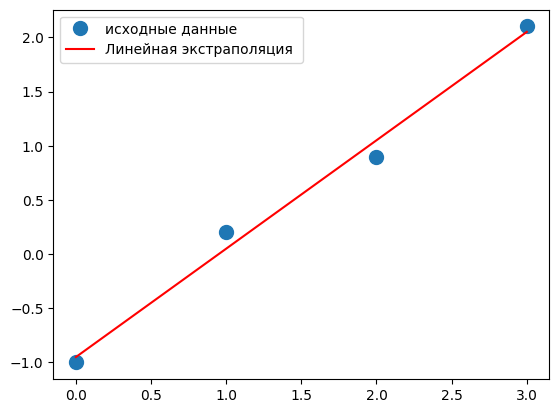

In [1]:
#пример 1.1.1
import numpy as np

x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

# Перепишем линейное уравнение y = mx + C как y = Ap, где А = [[ x 1 ]] и p = [[m], [c]]
# Построим A по Х:

A = np.vstack([x,np.ones(len(x))]).T
A # print забыли

# Используем метод lstsq для решения его относительно вектора p
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

# Построим график полученной прямой и укажем на нем точки
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'исходные данные', markersize= 10)

plt.plot(x, m*x + c, 'r',label = 'Линейная экстраполяция ')
plt.legend()
plt.show()

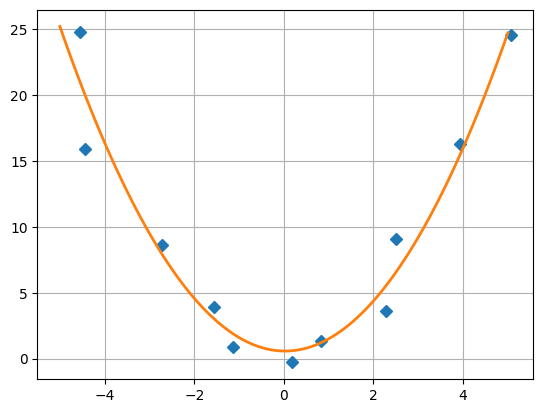

In [6]:
#пример 1.1.2
from numpy import *
from numpy.random import *

# генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.5)
x+= delta * (rand(11) - 0.5)

# записывае данные в файл
x.tofile('x_data.txt','\n')
y.tofile('y_data.txt','\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

# Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов
# задаем вектор m = [X**2, x, E]
m = vstack((x**2,x,ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m,y,rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x,y,'D')

# рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2], '-', lw = 2)
plt.grid()
plt.savefig("парабола.png")

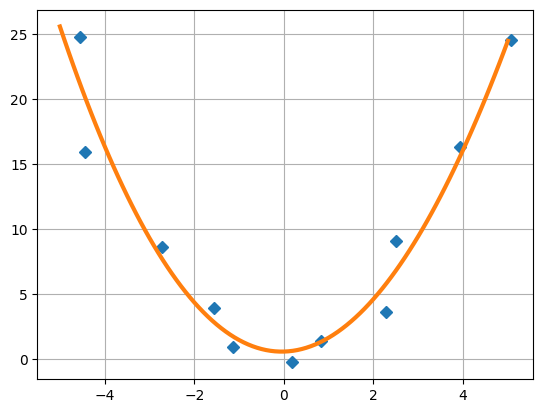

In [8]:
#пример 1.1.3
# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [X**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x, y, 'D')

# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig('полином 3-й степени.png')

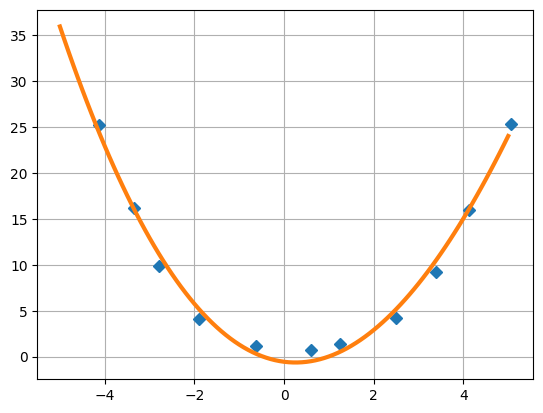

In [12]:
# генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2 + delta * (rand(11) - 0.1)
x+= delta * (rand(11) - 0.1)

# записывае данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

# читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

# Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
# задаем вектор m = [X**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T

# находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

# на отрезке [-5, 5]
x_prec = linspace(-5, 5, 101)

# рисуем точки
plt.plot(x,y,'D')

# рисуем кривую вида y = ax^3 + bx^2 + cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2]*x_prec + s[3], '-', lw = 3)
plt.grid()
plt.savefig("парабола.png")

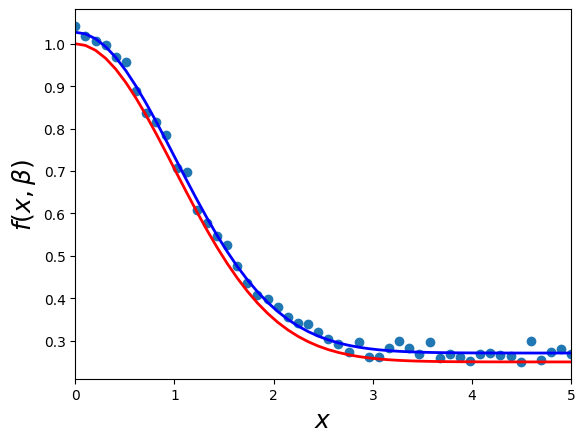

In [10]:
#пример 1.1.4
import scipy as sp
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * np.exp(-b2 * x**2)
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
# Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

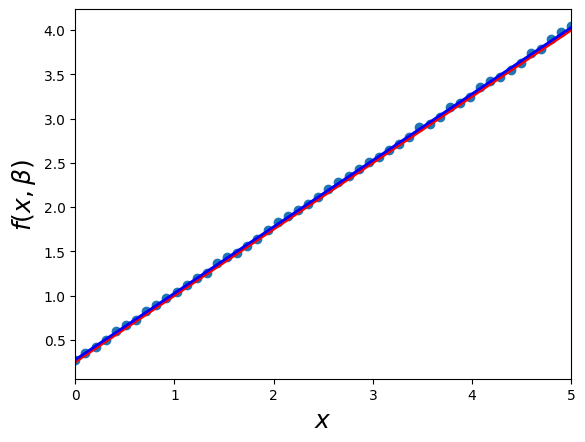

In [15]:
#пример 1.1.5
#1
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()


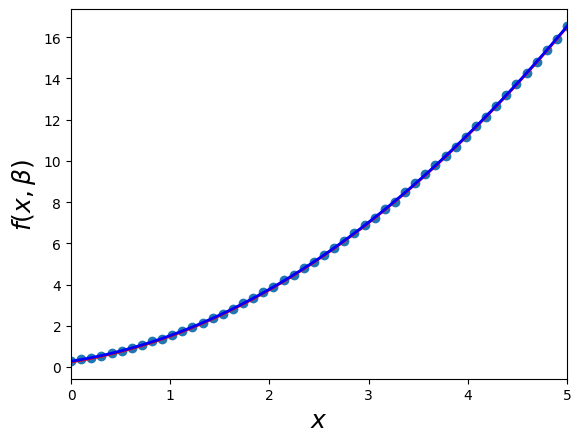

In [16]:
#2
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив из точек xi
xdata = np.linspace(0, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

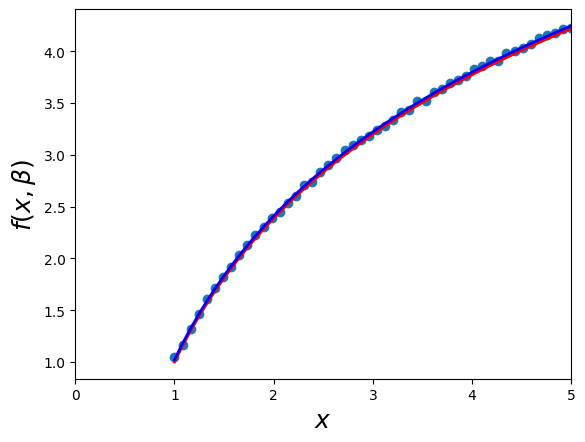

In [17]:
#3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив из точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

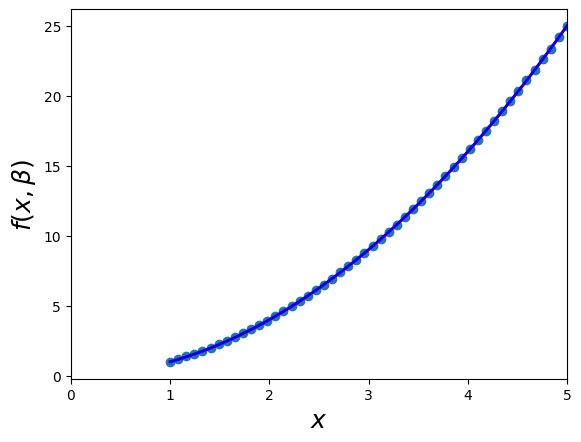

In [18]:
#4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив из точек xi
xdata = np.linspace(1, 5, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

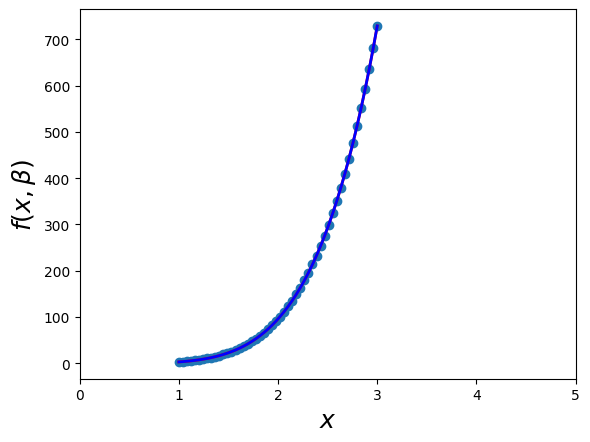

In [21]:
#задание
#4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (3, 5)
beta = (3, 5)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив из точек xi
xdata = np.linspace(1, 3, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

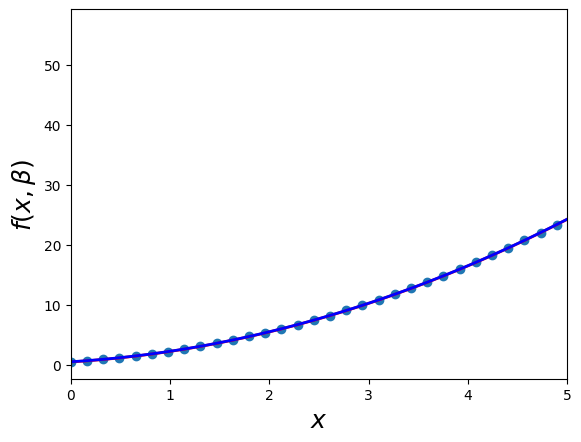

In [22]:
#2
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (0.45, 1, 0.75)
beta = (0.45, 1, 0.75)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
# зададим массив из точек xi
xdata = np.linspace(0, 8, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

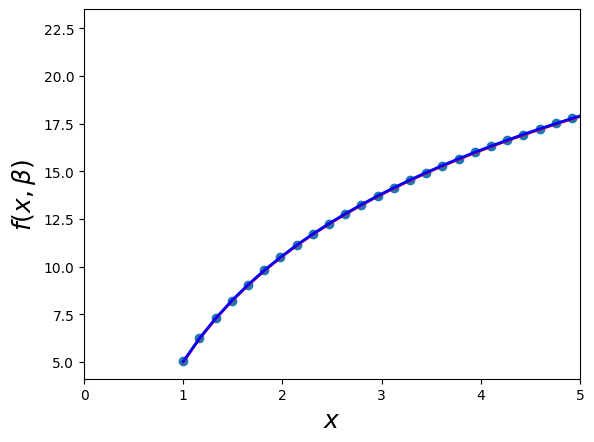

In [23]:
#3
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (5, 8)
beta = (5, 8)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
# зададим массив из точек xi
xdata = np.linspace(1, 9, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata -f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig,ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata,y,'r',lw =2 )
ax.plot(xdata,f(xdata,*beta_opt),'b',lw = 2)
ax.set_xlim(0,5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

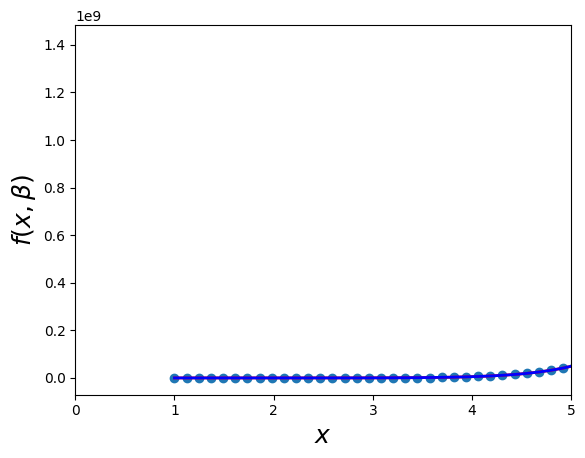

In [24]:
#4
# Добавим шума в данные, сделанные по функции f(x,b) с коэффициентами b = (5, 10)
beta = (5, 10)
def f(x, b0, b1):
    return b0 * x ** b1
# зададим массив из точек xi
xdata = np.linspace(1, 7, 50)
# создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.rand(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt
# Вычислим линейное отклонение
lin_dev = sum(beta_cov[0])
lin_dev

# Вычислим квадратичное уравнение
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
fres

fig, ax = plt.subplots()
ax.scatter(xdata,ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize = 18)
ax.set_ylabel(r"$f(x,\beta)$", fontsize = 18)
plt.show()

In [29]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

(20, 2)


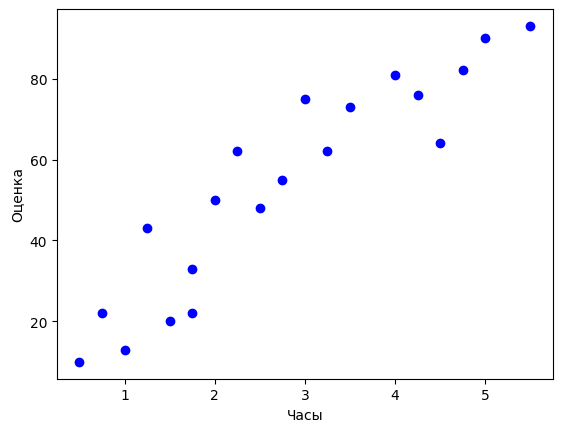

In [30]:
# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваеимостью
my_dict = {'Учебное время':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
        "Оценка":[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}



dataset = pd.DataFrame(my_dict)
dataset.head()


# Нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"],dataset['Оценка'],color ='b',label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [31]:
# Импортируем необходимые библиотеки
# используем pandas и numpy для обработки данных,
# matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
# создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваеимостью
my_dict = {'Учебное время':[0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
        "Оценка":[10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}



dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [32]:
# Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


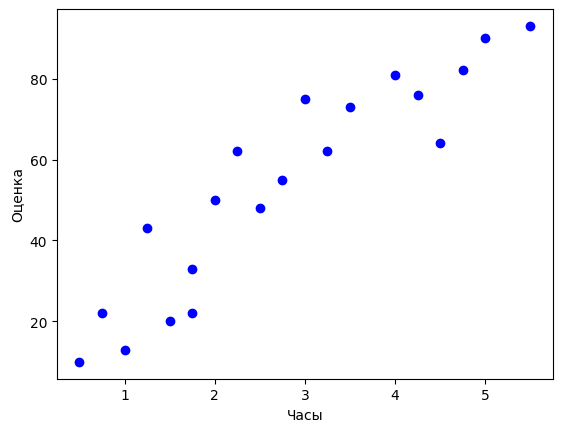

In [33]:
# Нарисуем точечную диаграмму
plt.scatter(dataset["Учебное время"],dataset['Оценка'],color ='b',label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

In [34]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

# Теперь когда у нас есть атрибуты и метки, необходимо разделить их на a обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]
11.564766839378237
[15.64766839]


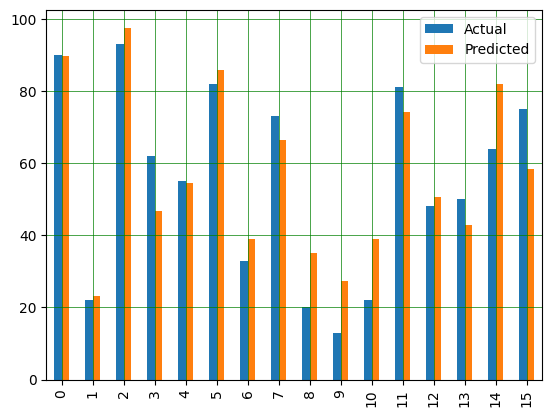

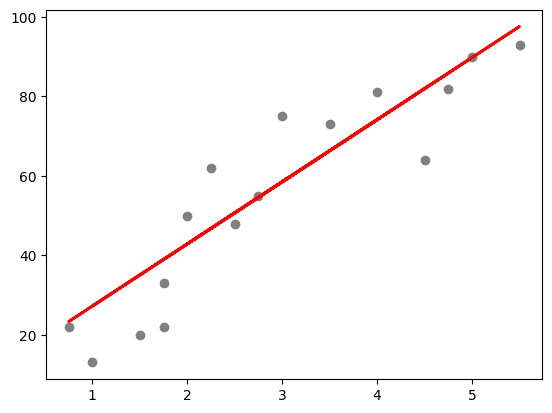

In [35]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})

# визуазилируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color = 'gray')
plt.plot(X_test, y_pred, color = 'red', linewidth=2)
plt.show()

(30, 2)


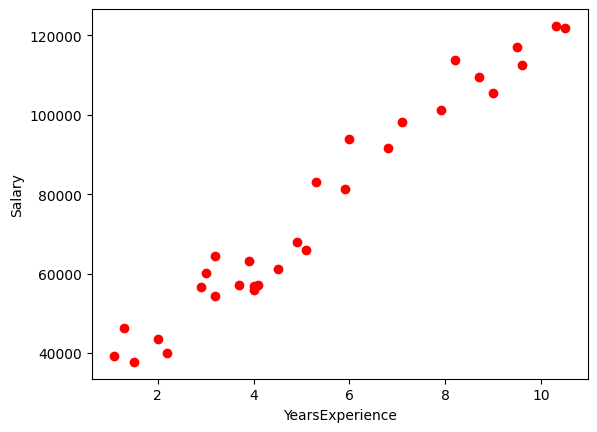

In [38]:
#задание 
url = "https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linear-regression/master/Salary_Data.csv"
dataset = pd.read_csv(url)

# Исследуем набор данных
print(dataset.shape)
dataset.describe()

# Нарисуем точечную диаграмму
plt.scatter(dataset['YearsExperience'],dataset["Salary"],color = 'r',label = "Salary data ")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.show()

In [39]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)

# Теперь когда у нас есть атрибуты и метки, необходимо разделить их на a обучающий и тестовый наборы
# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]
25825.984232150113
[9133.88237036]


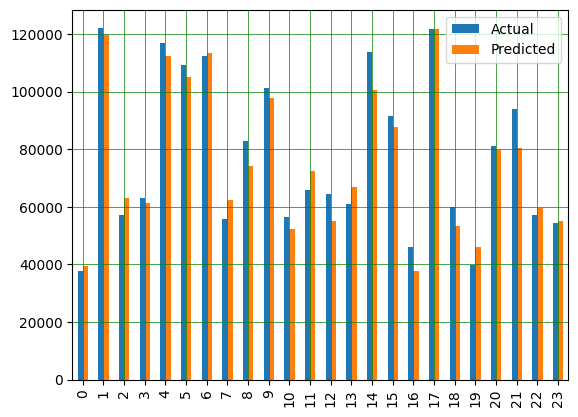

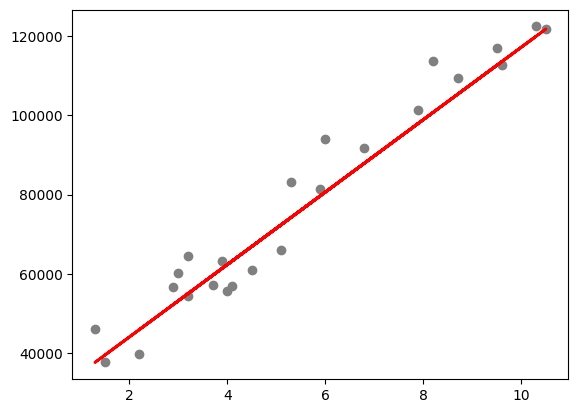

In [40]:
y_pred = regressor.predict(X_test)
# сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, "Predicted": y_pred})


# визуазилируем результат сравнения в виде гистограммы
df.plot(kind = 'bar')
plt.grid(which='major', linestyle = '-', linewidth ='0.5', color = 'green')
plt.grid(which='minor', linestyle = ':', linewidth ='0.5', color = 'black')
plt.show()

# построим линию регрессии с тестовыми данными
plt.scatter(X_test,y_test,color = 'gray')
plt.plot(X_test,y_pred,color = 'red', linewidth=2)

In [41]:
#пример 1.3.1
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]

X = np.transpose(X)
X = np.c_[X,np.ones(X.shape[0])]
linreg = np.linalg.lstsq(X,y,rcond=None)[0]
print(linreg)

[ 0.13099364  0.26625828 -0.02194925  1.50231509]


In [51]:
#пример 1.3.2
import pandas as pd
import numpy as np
import seaborn as seabornInstanse
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import matplotlib.pyplot as plt

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,4,4,3,1,2,3,4,1,3,9,7]]

# формируем DataFrame из двух списков
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns={0:'y'}, inplace= False)
df2 = df2.rename(columns={0:'x1',1:'x2',2:'x3'},inplace= False)

frames = [df1,df2]
dataset = pd.concat([df1,df2], axis=1,join="inner")
print(dataset.head()) # принт

# изучим данные
print(dataset.shape)
dataset.describe()

# разделим данные на метки и атрибуты
X = dataset[['x1','x2','x3']]
y = dataset['y']
 
# разделим данные на обучающую и тестовую выборки
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=0)

# для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

# выведем коэфициент модели
coeff_df =  pd.DataFrame(regressor.coef_,X.columns, columns=["Coefficient"])
print(coeff_df) # принт

# чтобы сделать прогнозы на тестовых данных, выполните следующй код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
print(df) # принт

# последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя все значения для MSE 
print("Mean Squared Error:", metrics.mean_squared_error(y_test,y_pred))

   y  x1  x2  x3
0  1   0   4   4
1  2   2   1   1
2  3   4   2   2
3  4   1   3   5
4  3   5   4   6
(23, 4)
    Coefficient
x1     1.894737
x2    -4.052632
x3    -2.947368
    Actual  Predicted
11       5 -13.736842
10       4 -14.315789
21       3  -8.315789
14       4   3.157895
20       1  27.473684
1        2  25.789474
13       5  -0.052632
22       1  -6.473684
16       6   8.263158
8        5   5.157895
6        5  -9.421053
17       0  -2.789474
4        3   4.578947
2        3  22.578947
5        4  -4.315789
18       6  -9.789474
9        5  -9.947368
7        3  -8.842105
19       3  29.315789
Mean Squared Error: 218.14929289983965


In [52]:
#задание
url1 = 'https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv'
url2 = 'https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv'

dataset1 = pd.read_csv(url1)
dataset2 = pd.read_csv(url2)
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,1].values

# Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train1, X_test1, y_train1, y_test1 = train_test_split(x, y, test_size = 0.2, random_state = 0)
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, y, test_size = 0.2, random_state = 0)

# далее можно обучить алгоритм линейной регрессии
# необходимо импортировать класс LinearRegression, создать его экземляр и вызвать метод fit()
regressor1 = LinearRegression()
regressor1.fit(X_train1, y_train1)

regressor2 = LinearRegression()
regressor2.fit(X_train2, y_train2)
y_pred1 = regressor1.predict(X_test1)
# сравним фактические значения с прогнозируемыми
df1 = pd.DataFrame({'Actual': y_test1, 'Predicted': y_pred1})
display(df1)

y_pred2 = regressor2.predict(X_test2)
df2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
display(df2)

print('Mean Squared Error first csv: ', metrics.mean_squared_error(y_test1, y_pred1))
print('Mean Squared Error second csv: ', metrics.mean_squared_error(y_test2, y_pred2))

,Actual,Predicted
0,7,7.0
1,3,3.0
2,5,5.0
3,6,6.0
4,6,6.0


,Actual,Predicted
0,7,7.0
1,3,3.0
2,5,5.0
3,6,6.0
4,6,6.0


Mean Squared Error first csv:  1.143848312570467e-30
Mean Squared Error second csv:  1.143848312570467e-30


[[5.  1. ]
 [5.2 1. ]
 [5.4 1. ]
 [5.6 1. ]
 [5.8 1. ]
 [6.  1. ]]
0.14285714285714313 2.3809523809523783


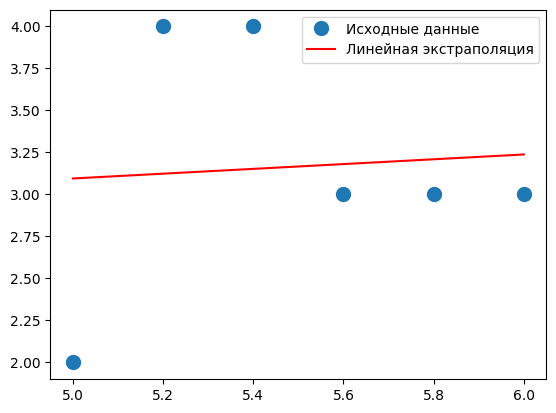

[  -4.46428571   49.25       -132.14285714]


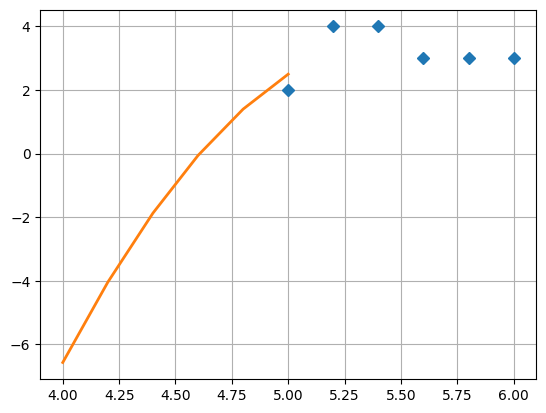

In [56]:
#задание*
import numpy as np
import matplotlib.pyplot as plt

x = np.array([5.0, 5.2, 5.4, 5.6, 5.8, 6.0])
y = np.array([2.0, 4.0, 4.0, 3.0, 3.0, 3.0])

A = np.vstack([x, np.ones(len(x))]).T
print(A)

m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

m = np.vstack((x ** 2, x, np.ones(6))).T

s = np.linalg.lstsq(m, y, rcond = None)[0]

x_prec = np.linspace(4, 5, 6)

plt.plot(x, y, 'D')
plt.plot(x_prec, s[0] * x_prec ** 2 + s[1] * x_prec + s[2], '-', lw = 2)
plt.grid()
print(s)